In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import optimizers
from keras import losses
from keras import metrics
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

# Loading dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# transform to rgb as required by VGG
x_train=tf.image.grayscale_to_rgb(tf.expand_dims(x_train, axis=3)) 
x_test=tf.image.grayscale_to_rgb(tf.expand_dims(x_test, axis=3))

#resize to minimum size of (32x32)
x_train=tf.image.resize_with_pad(x_train,32,32)
x_test=tf.image.resize_with_pad(x_test,32,32)

x_train, x_test = x_train / 255., x_test / 255.

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [4]:
model = Sequential([
   conv_base,
   Flatten(),
   Dense(256, activation="sigmoid"),
   Dense(10, activation="softmax"),
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=2048,
)

Epoch 1/50
30/30 [==============================] - 631s 21s/step - loss: 1.7637 - accuracy: 0.5349
Epoch 2/50
30/30 [==============================] - 619s 21s/step - loss: 1.0325 - accuracy: 0.7286
Epoch 3/50
30/30 [==============================] - 617s 21s/step - loss: 0.7911 - accuracy: 0.7572
Epoch 4/50
30/30 [==============================] - 618s 21s/step - loss: 0.6890 - accuracy: 0.7763
Epoch 5/50
30/30 [==============================] - 617s 21s/step - loss: 0.6294 - accuracy: 0.7912
Epoch 6/50
30/30 [==============================] - 620s 21s/step - loss: 0.5888 - accuracy: 0.8007
Epoch 7/50
30/30 [==============================] - 619s 21s/step - loss: 0.5585 - accuracy: 0.8086
Epoch 8/50
30/30 [==============================] - 618s 21s/step - loss: 0.5351 - accuracy: 0.8157
Epoch 9/50
30/30 [==============================] - 619s 21s/step - loss: 0.5158 - accuracy: 0.8201
Epoch 10/50
30/30 [==============================] - 619s 21s/step - loss: 0.5000 - accuracy: 0.8249

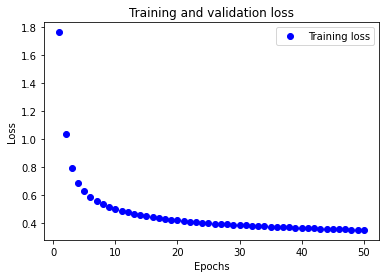

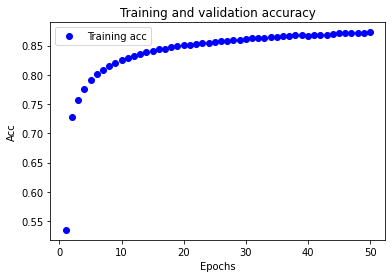

In [9]:
history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 110s - loss: 0.3948 - accuracy: 0.8579 - 110s/epoch - 352ms/step
